In [31]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import string
from sklearn.metrics import classification_report

In [32]:
data=pd.read_csv('email_dataset_clear.csv')
data.dropna(inplace=True)

In [33]:
data.columns

Index(['Category', 'Message'], dtype='object')

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5567 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5567 non-null   object
 1   Message   5567 non-null   object
dtypes: object(2)
memory usage: 130.5+ KB


In [35]:
data.isna().sum()

Category    0
Message     0
dtype: int64

In [36]:
data['Spam']=data['Category'].apply(lambda x:1 if x=='spam' else 0)
data.head(5)

,Category,Message,Spam
0,ham,go jurong point crazy available bugis n great ...,0
1,ham,ok lar joking wif u oni,0
2,spam,free entry 2 wkly comp win fa cup final tkts 2...,1
3,ham,u dun say early hor u c already say,0
4,ham,nah dont think goes usf lives around though,0


In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data.Message,data.Spam,test_size=0.2, random_state=42)

In [38]:
from sklearn.feature_extraction.text import CountVectorizer

In [39]:
count_vectorizer = CountVectorizer()
X_train_counts = count_vectorizer.fit_transform(X_train)
X_test_counts = count_vectorizer.transform(X_test)

Naive Bayes

In [40]:
from sklearn.naive_bayes import MultinomialNB

In [41]:
from sklearn.pipeline import Pipeline
clf=Pipeline([
    ('vectorizer',CountVectorizer()),
    ('nb',MultinomialNB())
])
# clf = MultinomialNB()


In [42]:
# clf.fit(X_train,y_train)
# # 
clf.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

In [43]:
# clf.predict(emails)

In [44]:
# Dự đoán trên tập kiểm tra
y_pred = clf.predict(X_test)

# Tính toán độ chính xác và in báo cáo phân loại
accuracy1 = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy1)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9757630161579892
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       951
           1       0.94      0.89      0.91       163

    accuracy                           0.98      1114
   macro avg       0.96      0.94      0.95      1114
weighted avg       0.98      0.98      0.98      1114



KNN

In [45]:
from sklearn.neighbors import KNeighborsClassifier

In [46]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train_counts, y_train)

KNeighborsClassifier()

In [47]:
y_pred = knn_classifier.predict(X_test_counts)
accuracy2 = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy2)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9066427289048474
Classification Report:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95       951
           1       1.00      0.36      0.53       163

    accuracy                           0.91      1114
   macro avg       0.95      0.68      0.74      1114
weighted avg       0.92      0.91      0.89      1114



Support Vector Machines (SVM)

In [48]:
from sklearn.svm import SVC

In [49]:
svm_classifier = SVC()
svm_classifier.fit(X_train_counts, y_train)

SVC()

In [50]:
y_pred = svm_classifier.predict(X_test_counts)
accuracy3 = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# In ra kết quả
print("SVM Accuracy:", accuracy3)
print("SVM Classification Report:")
print(classification_rep)

SVM Accuracy: 0.9721723518850988
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       951
           1       0.99      0.82      0.90       163

    accuracy                           0.97      1114
   macro avg       0.98      0.91      0.94      1114
weighted avg       0.97      0.97      0.97      1114



Logistic Regression

In [51]:
from sklearn.linear_model import LogisticRegression

In [52]:
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train_counts, y_train)

LogisticRegression()

In [53]:
y_pred = logistic_regression.predict(X_test_counts)
accuracy4 = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# In ra kết quả
print("Logistic Regression Accuracy:", accuracy4)
print("Logistic Regression Classification Report:")
print(classification_rep)

Logistic Regression Accuracy: 0.9766606822262118
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       951
           1       0.99      0.85      0.91       163

    accuracy                           0.98      1114
   macro avg       0.98      0.93      0.95      1114
weighted avg       0.98      0.98      0.98      1114



Random Forest

In [54]:
from sklearn.ensemble import RandomForestClassifier

In [55]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train_counts, y_train)

RandomForestClassifier()

In [56]:
y_pred = random_forest.predict(X_test_counts)
accuracy5 = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# In ra kết quả
print("Random Forest Accuracy:", accuracy5)
print("Random Forest Classification Report:")
print(classification_rep)

Random Forest Accuracy: 0.9685816876122083
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       951
           1       0.99      0.79      0.88       163

    accuracy                           0.97      1114
   macro avg       0.98      0.90      0.93      1114
weighted avg       0.97      0.97      0.97      1114



Gradient Boosting


In [57]:
from sklearn.ensemble import GradientBoostingClassifier

In [58]:
gradient_boosting = GradientBoostingClassifier()
gradient_boosting.fit(X_train_counts, y_train)

GradientBoostingClassifier()

In [59]:
y_pred = gradient_boosting.predict(X_test_counts)
accuracy6 = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# In ra kết quả
print("Gradient Boosting Accuracy:", accuracy6)
print("Gradient Boosting Classification Report:")
print(classification_rep)

Gradient Boosting Accuracy: 0.9631956912028725
Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       951
           1       0.99      0.75      0.86       163

    accuracy                           0.96      1114
   macro avg       0.98      0.88      0.92      1114
weighted avg       0.96      0.96      0.96      1114



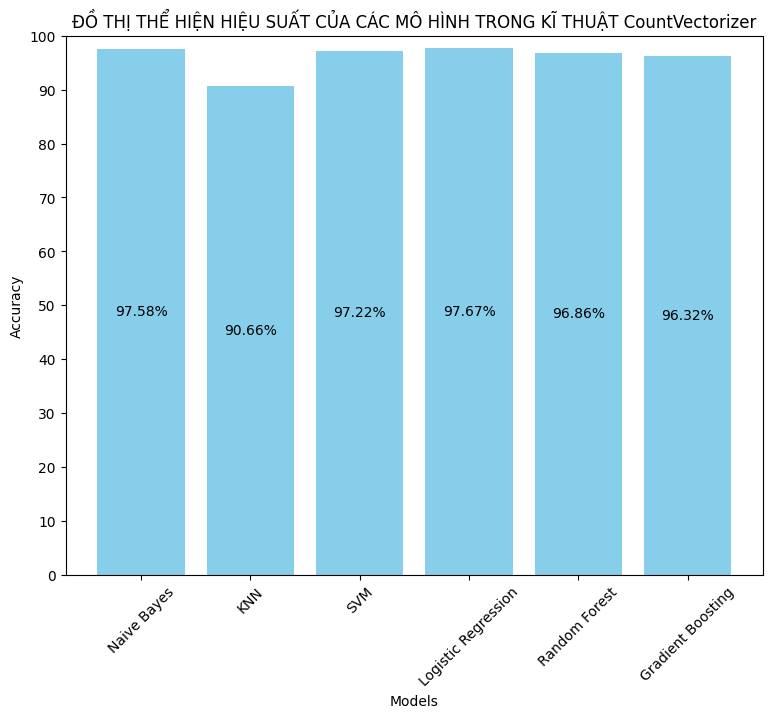

In [60]:
import matplotlib.pyplot as plt
import numpy as np

# Các độ chính xác của từng mô hình (ví dụ)
accuracies = [accuracy1 * 100, accuracy2 * 100, accuracy3 * 100, accuracy4 * 100, accuracy5 * 100, accuracy6 * 100]


# Tên của từng mô hình
models = ["Naive Bayes", "KNN", "SVM", "Logistic Regression", "Random Forest", "Gradient Boosting"]

# Vẽ biểu đồ cột
plt.figure(figsize=(9, 7))
bars = plt.bar(models, accuracies, color='skyblue')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('ĐỒ THỊ THỂ HIỆN HIỆU SUẤT CỦA CÁC MÔ HÌNH TRONG KĨ THUẬT CountVectorizer')
plt.ylim(0, 100)  # Giới hạn trục y từ 0 đến 1
plt.yticks(np.arange(0, 105, 10))
plt.xticks(rotation=45)  # Xoay tên mô hình để dễ đọc hơn

# Ghi số liệu lên trên các cột
for bar, accuracy in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height()/2, f'{accuracy:.2f}%', 
             ha='center', va='center')
plt.show()